In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Anscombe's Quartet and Residuals**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/850px-Anscombe%27s_quartet_3.svg.png">

<table class="wikitable">
<tbody><tr>
<th>Property
</th>
<th>Value
</th>
<th>Accuracy
</th></tr>
<tr>
<td><a href="/wiki/Mean" title="Mean">Mean</a> of <i>x</i>
</td>
<td>9
</td>
<td>exact
</td></tr>
<tr>
<td>Sample <a href="/wiki/Variance" title="Variance">variance</a> of <i>x</i>  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \sigma ^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>&#x03C3;<!-- σ --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \sigma ^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/53a5c55e536acf250c1d3e0f754be5692b843ef5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.385ex; height:2.676ex;" alt="\sigma ^{2}"/></span>
</td>
<td>11
</td>
<td>exact
</td></tr>
<tr>
<td>Mean of <i>y</i>
</td>
<td>7.50
</td>
<td>to 2 decimal places
</td></tr>
<tr>
<td>Sample variance of <i>y</i>  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \sigma ^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>&#x03C3;<!-- σ --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \sigma ^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/53a5c55e536acf250c1d3e0f754be5692b843ef5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.385ex; height:2.676ex;" alt="\sigma ^{2}"/></span>
</td>
<td>4.125
</td>
<td>±0.003
</td></tr>
<tr>
<td><a href="/wiki/Correlation" class="mw-redirect" title="Correlation">Correlation</a> between <i>x</i> and <i>y</i>
</td>
<td>0.816
</td>
<td>to 3 decimal places
</td></tr>
<tr>
<td><a href="/wiki/Linear_regression" title="Linear regression">Linear regression</a> line
</td>
<td><i>y</i>&#160;=&#160;3.00&#160;+&#160;0.500<i>x</i>
</td>
<td>to 2 and 3 decimal places, respectively
</td></tr>
<tr>
<td><a href="/wiki/Coefficient_of_determination" title="Coefficient of determination">Coefficient of determination</a> of the linear regression  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle R^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>R</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle R^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5ce07e278be3e058a6303de8359f8b4a4288264a" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.818ex; height:2.676ex;" alt="R^{2}"/></span>
</td>
<td>0.67
</td>
<td>to 2 decimal places
</td></tr></tbody></table>

In [4]:
quartet = pd.read_csv('./course-data/anscombes_quartet1.csv')

In [5]:
quartet.head()

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33


In [6]:
quartet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       11 non-null     float64
 1   y       11 non-null     float64
dtypes: float64(2)
memory usage: 304.0 bytes


In [7]:
quartet.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,11.0,9.000000,3.316625,4.00,6.500,9.00,11.50,14.00
y,11.0,7.500909,2.031568,4.26,6.315,7.58,8.57,10.84


<AxesSubplot:xlabel='x', ylabel='y'>

<AxesSubplot:xlabel='x', ylabel='y'>

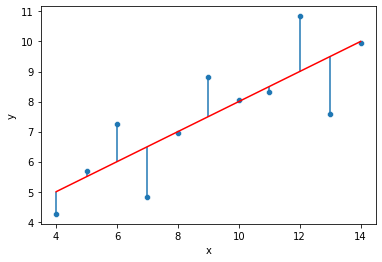

In [8]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

<AxesSubplot:xlabel='residual', ylabel='Density'>

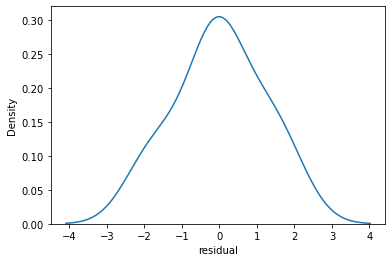

In [9]:
sns.kdeplot(quartet['residual'])

<AxesSubplot:xlabel='y', ylabel='residual'>

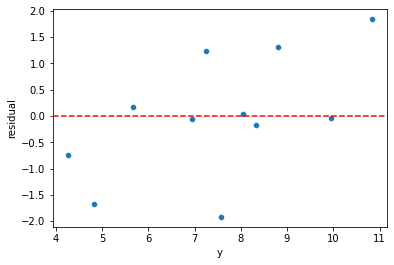

In [10]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

---

In [11]:
quartet = pd.read_csv('./course-data/anscombes_quartet2.csv')

In [12]:
quartet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       11 non-null     float64
 1   y       11 non-null     float64
dtypes: float64(2)
memory usage: 304.0 bytes


In [13]:
quartet.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,11.0,9.000000,3.316625,4.0,6.500,9.00,11.50,14.00
y,11.0,7.500909,2.031657,3.1,6.695,8.14,8.95,9.26


In [14]:
# quartet.columns = ['x','y']

<AxesSubplot:xlabel='x', ylabel='y'>

<AxesSubplot:xlabel='x', ylabel='y'>

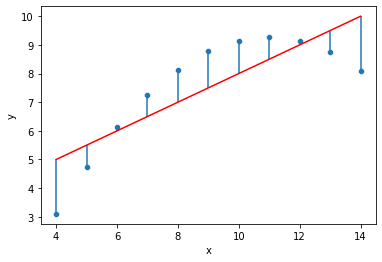

In [15]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

<AxesSubplot:xlabel='residual', ylabel='Density'>

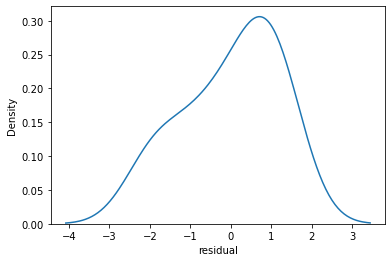

In [16]:
sns.kdeplot(quartet['residual'])

<AxesSubplot:xlabel='y', ylabel='residual'>

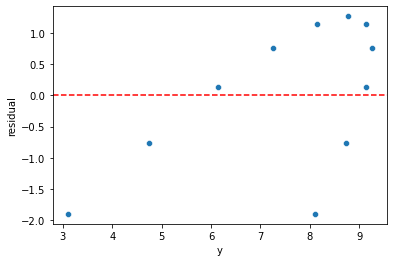

In [17]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

In [18]:
quartet = pd.read_csv('./course-data/anscombes_quartet4.csv')

In [19]:
quartet.head()
quartet.info()
quartet.describe().transpose()

,x,y
0,8.0,6.58
1,8.0,5.76
2,8.0,7.71
3,8.0,8.84
4,8.0,8.47


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       11 non-null     float64
 1   y       11 non-null     float64
dtypes: float64(2)
memory usage: 304.0 bytes


,count,mean,std,min,25%,50%,75%,max
x,11.0,9.000000,3.316625,8.00,8.00,8.00,8.00,19.0
y,11.0,7.500909,2.030579,5.25,6.17,7.04,8.19,12.5


In [20]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']

In [21]:
quartet['residual'] = quartet['y'] - quartet['pred_y']

<AxesSubplot:xlabel='x', ylabel='y'>

<AxesSubplot:xlabel='x', ylabel='y'>

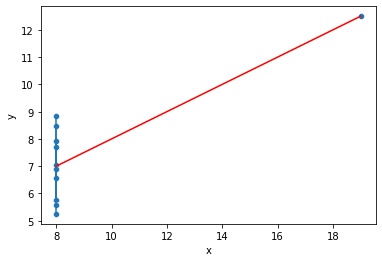

In [22]:
sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

<AxesSubplot:xlabel='residual', ylabel='Density'>

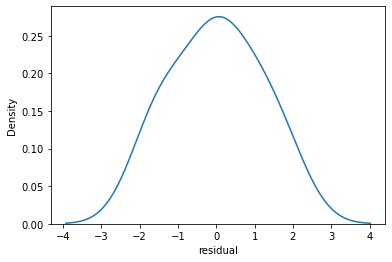

In [23]:
sns.kdeplot(quartet['residual'])

<AxesSubplot:xlabel='y', ylabel='residual'>

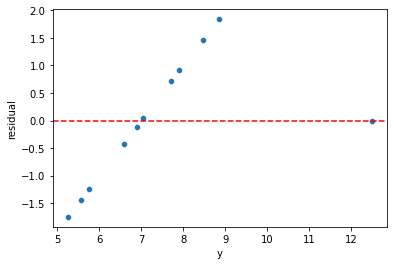

In [24]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')